In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fft_analysis(signal):
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend
    fft_values = np.fft.fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))
    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]
    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")
    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    return dominant_frequency

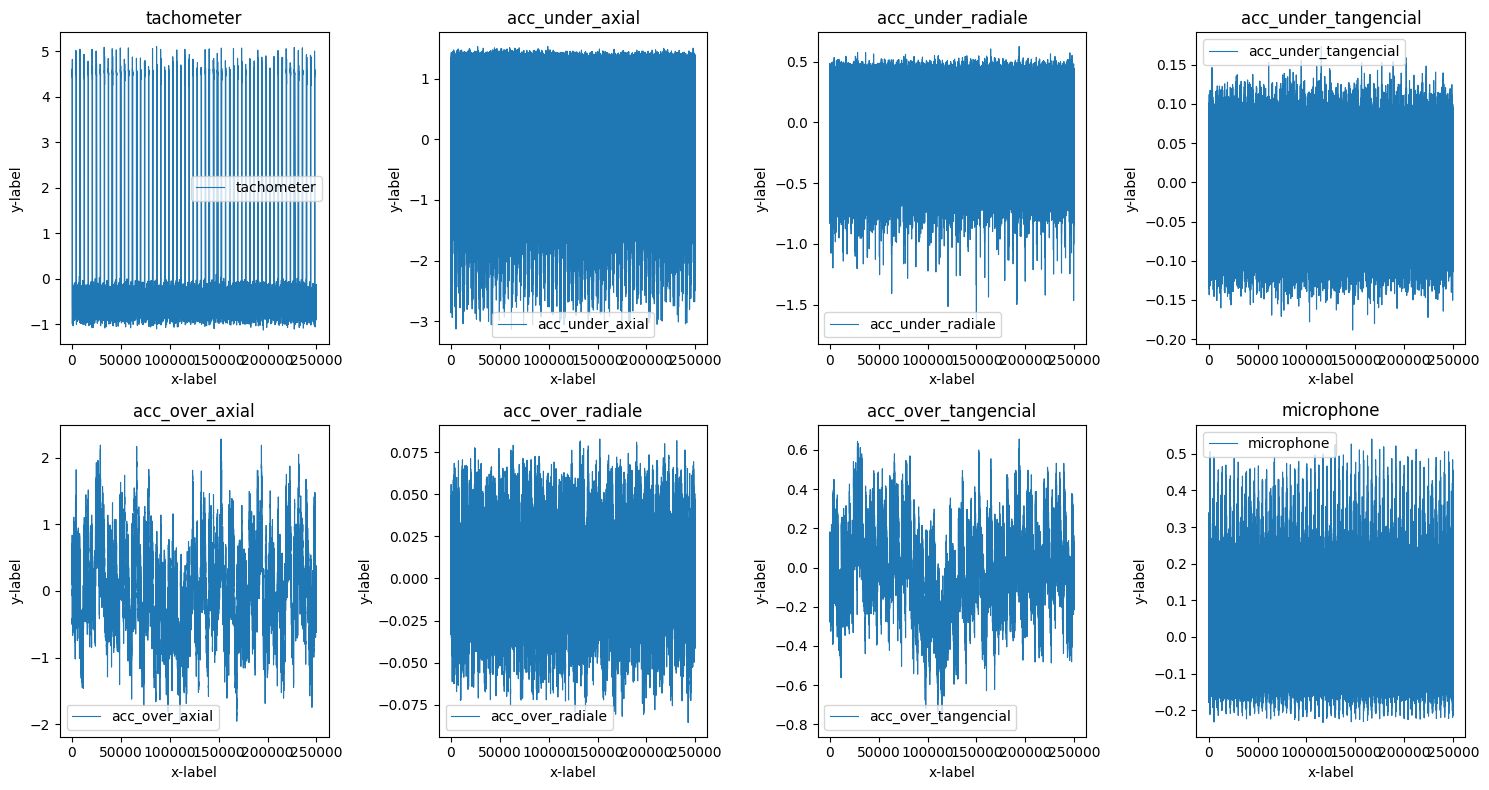

In [20]:
file_path = './bearing_fault_detection_reduced/normal/12.288.csv'
data = pd.read_csv(file_path)

data.columns = [
    "tachometer",
    "acc_under_axial",
    "acc_under_radiale",
    "acc_under_tangencial",
    "acc_over_axial",
    "acc_over_radiale",
    "acc_over_tangencial",
    "microphone",
]

# Crear los gráficos de cada señal
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for i, column in enumerate(data.columns):
    axes[i].plot(data[column], label=column, linewidth=0.8)
    axes[i].set_title(column)
    axes[i].set_xlabel("x-label")
    axes[i].set_ylabel("y-label")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [15]:
data.head()

,tachometer,acc_under_axial,acc_under_radiale,acc_under_tangencial,acc_over_axial,acc_over_radiale,acc_over_tangencial,microphone
0,4.6038,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310
1,4.5703,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527
2,4.5870,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445
3,4.5887,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901
4,4.5675,1.240300,0.354010,0.040460,-0.36806,0.044062,-0.14258,-0.054880


In [21]:
import pandas as pd
import os
# Crear una lista con los nombres de los estadísticos
statistics_list = ['mean', 'median', 'std', 'variance', 'range', 'skewness', 'kurtosis']

# Crear un diccionario para almacenar los resultados de cada estadístico
statistics_dict = {}

# Calcular cada estadístico para cada columna y agregarlo al diccionario
for col in data.columns:
    statistics_dict[f'{col}_mean'] = data[col].mean()
    statistics_dict[f'{col}_median'] = data[col].median()
    statistics_dict[f'{col}_std'] = data[col].std()
    statistics_dict[f'{col}_variance'] = data[col].var()
    statistics_dict[f'{col}_range'] = data[col].max() - data[col].min()
    statistics_dict[f'{col}_skewness'] = data[col].skew()
    statistics_dict[f'{col}_kurtosis'] = data[col].kurt()
    statistics_dict[f'{col}_dominant_frequency'] = fft_analysis(data[col])
# Convertir el diccionario a un DataFrame
statistics_df = pd.DataFrame(statistics_dict, index=[0])

# Extraer las partes del path
label = "_".join(os.path.normpath(file_path).split(os.sep)[1:-1])  # [1:-1] es por si está en más de una carpeta a la vez, ejemplo: ['underhang', 'cage_fault', '6g'] --> 'underhang_cage_fault_6g'

# Añadir la columna 'label' al DataFrame
statistics_df['label'] = label

# Guardar el DataFrame con las estadísticas en un nuevo archivo CSV
statistics_df.to_csv('estadisticas_output.csv', index=False)

# Mostrar el DataFrame de estadísticas
print(statistics_df.head())


Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.441
Dominant Period: 2.27 time units
   tachometer_mean  tachometer_median  tachometer_std  tachometer_variance  \
0         0.002912           -0.53779         1.58555             2.513968   

   tachometer_range  tachometer_skewness  tachometer_kurtosis  \
0            6.2337             2.500476             4.304879   

   tachometer_dominant_frequency  acc_under_axial_mean  \
0                       0.000484             -0.002661   

   acc_under_axial_median  ...  acc_over_tangencial_dominant_frequency  \
0                0.075687  ...       

In [22]:
# Crear un diccionario para almacenar los resultados de cada estadístico
statistics_acc_over_dict = {}

acc_over = ['acc_over_axial', 'acc_over_radiale', 'acc_over_tangencial']

# Calcular cada estadístico para cada columna y agregarlo al diccionario
for col in acc_over:
    statistics_acc_over_dict[f'{col}_mean'] = data[col].mean()
    statistics_acc_over_dict[f'{col}_median'] = data[col].median()
    statistics_acc_over_dict[f'{col}_std'] = data[col].std()
    statistics_acc_over_dict[f'{col}_variance'] = data[col].var()
    statistics_acc_over_dict[f'{col}_range'] = data[col].max() - data[col].min()
    statistics_acc_over_dict[f'{col}_skewness'] = data[col].skew()
    statistics_acc_over_dict[f'{col}_kurtosis'] = data[col].kurt()
    statistics_acc_over_dict[f'{col}_dominant_frequency'] = fft_analysis(data[col])

# Convertir el diccionario a un DataFrame
statistics_acc_over_dict = pd.DataFrame(statistics_acc_over_dict, index=[0])

label = "_".join(os.path.normpath(file_path).split(os.sep)[1:-1])
statistics_acc_over_dict['label'] = label

# Guardar el DataFrame con las estadísticas en un nuevo archivo CSV
statistics_acc_over_dict.to_csv('estadisticas_acc_over_output.csv', index=False)

# Mostrar el DataFrame de estadísticas
print(statistics_acc_over_dict.head())

Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
Dominant Frequency: 0.000
Dominant Period: 2066.11 time units
   acc_over_axial_mean  acc_over_axial_median  acc_over_axial_std  \
0             0.031089               0.012927            0.668107   

   acc_over_axial_variance  acc_over_axial_range  acc_over_axial_skewness  \
0                 0.446366                4.2564                 0.163723   

   acc_over_axial_kurtosis  acc_over_axial_dominant_frequency  \
0                -0.387129                           0.000484   

   acc_over_radiale_mean  acc_over_radiale_median  ...  \
0               0.003156                  0.00426  ...   

   acc_over_radiale_dominant_frequency  acc_over_tangencial_mean  \
0                             0.000484                  0.004971   

   acc_over_tangencial_median  acc_over_tangencial_std  \
0                    0.004688                 0.197513   

   acc_over_tangen